# filter size Increase

Running Time (s):
0.6265835762023926


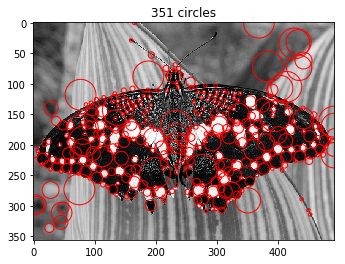

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage.filters import gaussian_laplace
import time
%matplotlib inline
start = time.time()


def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """

    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()
    fig.savefig('a.png')


img = np.float64(cv2.imread('butterfly.jpg', 0)) / 255

scale_space = np.empty((img.shape[0], img.shape[1], 12))
result = np.empty((img.shape[0], img.shape[1], 12))
sigma = 2
k = 1.22
loc_record_x = np.array([])
loc_record_y = np.array([])
radius_record = np.array([])

for i in range(12):
    a = sigma ** 2 * gaussian_laplace(img, sigma)
    scale_space[:, :, i] = a
    original = a ** 2
    p = scipy.ndimage.filters.rank_filter(original, rank=-1, size=5)
    threshold_min = np.percentile(p, 80)
    result[:, :, i] = np.clip(p, a_min=threshold_min, a_max=None)

    result[:, :, i][original != result[:, :, i]] = 0

    sigma = k * sigma

p = scipy.ndimage.filters.rank_filter(result, rank=-1, size=12)

sigma = 2
for i in range(12):
    mask = (scale_space[:, :, i] ** 2 == p[:, :, i])
    loc = np.where(mask == True)
    loc_record_x = np.append(loc_record_x, loc[0])
    loc_record_y = np.append(loc_record_y, loc[1])
    radius_record = np.append(radius_record, np.sqrt(2) * sigma * np.ones(np.size(loc[1])))
    sigma = k * sigma

end = time.time()
print('Running Time (s):')
print(end - start)

new_img = show_all_circles(img, loc_record_y, loc_record_x, radius_record, color='r')




# Image downsampling

C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:814: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  warn("Bi-quadratic interpolation behavior has changed due "


0.7462124824523926


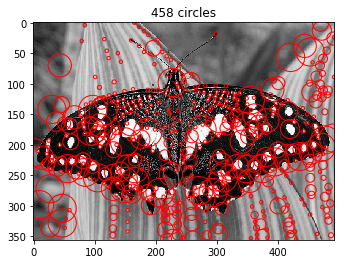

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage.filters import gaussian_laplace
import time
import skimage.transform

start = time.time()


def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """

    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()
    fig.savefig('a.png')


img = np.float64(cv2.imread('butterfly.jpg', 0)) / 255
result = np.empty((img.shape[0], img.shape[1], 12))
sigma = 2
k = 1.1
loc_record_x = np.array([])
loc_record_y = np.array([])
radius_record = np.array([])
shape = (img.shape[0], img.shape[1])

for i in range(12):
    a = gaussian_laplace(img, sigma)
    original = a ** 2
    p = scipy.ndimage.filters.rank_filter(original, rank=-1, size=3)

    threshold_min = np.percentile(p, 70)
    temp_result = np.clip(p, a_min=threshold_min, a_max=None)
    temp_result[original != temp_result] = 0
    temp_result = skimage.transform.resize(temp_result, shape, order=2)
    result[:, :, i] = temp_result
    img = skimage.transform.resize(img, (int(img.shape[0] / k), int(img.shape[1] / k)))

p = scipy.ndimage.filters.rank_filter(result, rank=-1, size=13)
img = np.float64(cv2.imread('butterfly.jpg', 0)) / 255

for i in range(12):
    mask = (result[:, :, i] == p[:, :, i])
    loc = np.where(mask == True)
    loc_record_x = np.append(loc_record_x, loc[0])
    loc_record_y = np.append(loc_record_y, loc[1])
    radius_record = np.append(radius_record, np.sqrt(2) * sigma * k ** i * np.ones(np.size(loc[1])))
    sigma = k * sigma

end = time.time()
print(end - start)

new_img = show_all_circles(img, loc_record_y, loc_record_x, radius_record, color='r')
